# Achievement 6.5_Unsupervised Machine Learning_Clustering

## Contents
- ###  Import Libraries
- ### Import & Review Data
- ### Clean and Prepare Data
- ### Feature Selection
- ### Standardize Features
- ### Elbow Method for Optimal k
- ### Run KMeans & Assign Clusters
- ### Cluster Visualizations
- ### Cluster Descriptive Summary
## Reflections & Interpretation

### Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Import & Review Data

In [2]:
# Load the dataset
working_df = pd.read_csv(r'C:\Users\rewha\Achievement 6 Project\02_Data\02.02_Data Cleaned\Global_Cybersecurity_Threats_2015-2024-First_Pass.csv')

In [3]:
# Verify Data Structure
working_df.head()

,Unnamed: 0,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,2,India,2017,Man-In-The-Middle,It,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-State,Social Engineering,AI-based Detection,7
4,4,Germany,2018,Man-In-The-Middle,It,74.41,810682,Insider,Social Engineering,VPN,68


In [4]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           3000 non-null   int64  
 1   Country                              3000 non-null   object 
 2   Year                                 3000 non-null   int64  
 3   Attack Type                          3000 non-null   object 
 4   Target Industry                      3000 non-null   object 
 5   Financial Loss (in Million $)        3000 non-null   float64
 6   Number of Affected Users             3000 non-null   int64  
 7   Attack Source                        3000 non-null   object 
 8   Security Vulnerability Type          3000 non-null   object 
 9   Defense Mechanism Used               3000 non-null   object 
 10  Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(4), objec

### Clean and Prepare Data

In [5]:
# Dropping 'Unnamed: 0'
working_df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# Checking for duplicate rows
duplicates = working_df.duplicated()
print("Duplicate rows found:", duplicates.sum())

Duplicate rows found: 0


In [7]:
# Checking for empty cells
for col in working_df.select_dtypes(include='object').columns:
    empty_count = (working_df[col].str.strip() == '').sum()
    print(f"Empty strings in '{col}':", empty_count)

Empty strings in 'Country': 0
Empty strings in 'Attack Type': 0
Empty strings in 'Target Industry': 0
Empty strings in 'Attack Source': 0
Empty strings in 'Security Vulnerability Type': 0
Empty strings in 'Defense Mechanism Used': 0


### Feature Selection

In [8]:
cluster_df = working_df[[
    'Incident Resolution Time (in Hours)',
    'Financial Loss (in Million $)',
    'Number of Affected Users'
]]

### Standardize Features

In [9]:
# Standardize the features
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_df)
scaled_df = pd.DataFrame(cluster_scaled, columns=cluster_df.columns)

### Elbow Method

In [10]:
# Run the elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

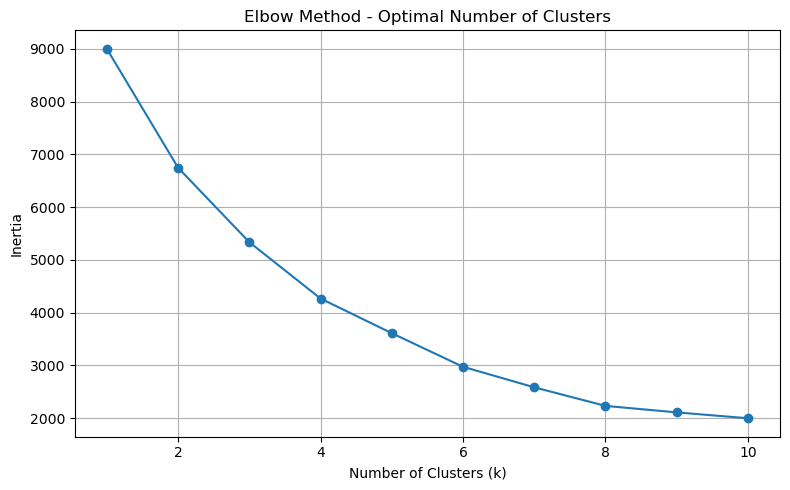

In [11]:
# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method - Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

### Run KMeans & Add Labels

In [12]:
# Choose your number of clusters
k = 3

In [13]:
# Run KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_df)

# Add cluster labels to your original working dataframe
working_df['Cluster'] = kmeans.labels_


### Cluster Visualizations

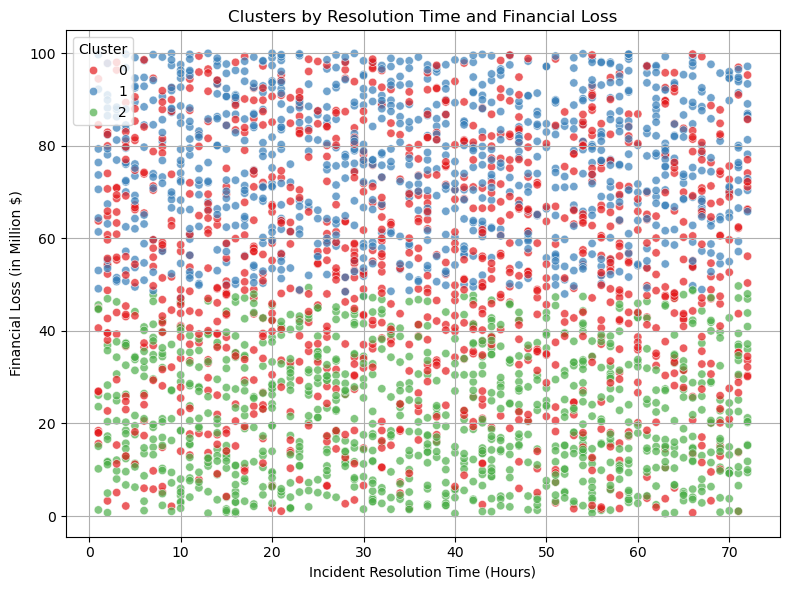

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=working_df,
    x='Incident Resolution Time (in Hours)',
    y='Financial Loss (in Million $)',
    hue='Cluster',
    palette='Set1',
    alpha=0.7
)
plt.title("Clusters by Resolution Time and Financial Loss")
plt.xlabel("Incident Resolution Time (Hours)")
plt.ylabel("Financial Loss (in Million $)")
plt.grid(True)
plt.tight_layout()
plt.show()


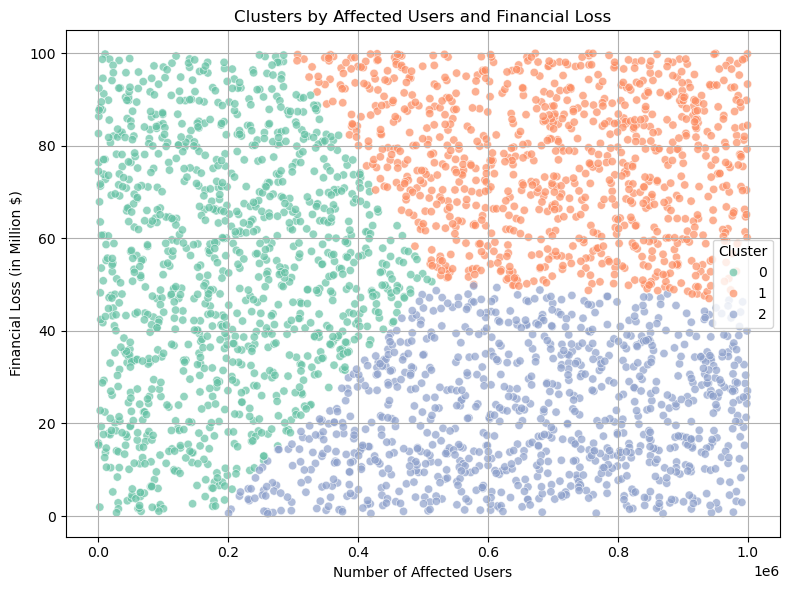

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=working_df,
    x='Number of Affected Users',
    y='Financial Loss (in Million $)',
    hue='Cluster',
    palette='Set2',
    alpha=0.7
)
plt.title("Clusters by Affected Users and Financial Loss")
plt.xlabel("Number of Affected Users")
plt.ylabel("Financial Loss (in Million $)")
plt.grid(True)
plt.tight_layout()
plt.show()


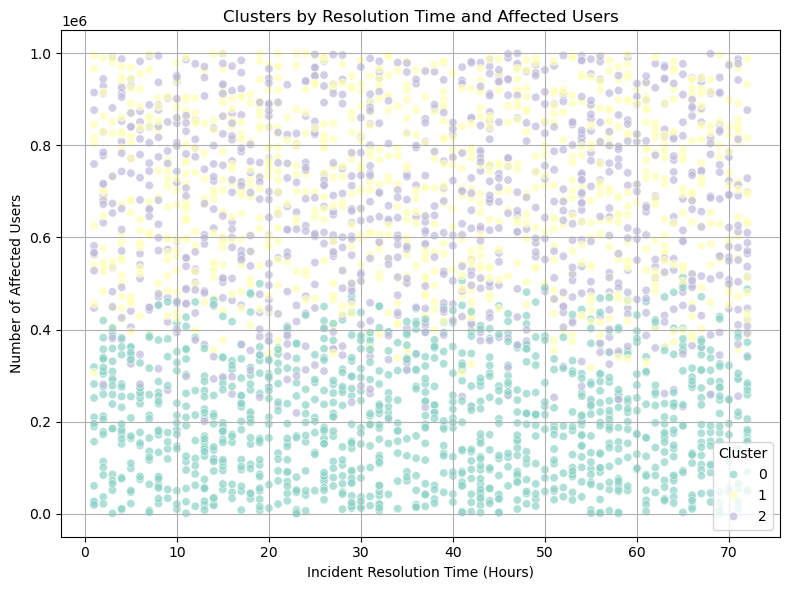

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=working_df,
    x='Incident Resolution Time (in Hours)',
    y='Number of Affected Users',
    hue='Cluster',
    palette='Set3',
    alpha=0.7
)
plt.title("Clusters by Resolution Time and Affected Users")
plt.xlabel("Incident Resolution Time (Hours)")
plt.ylabel("Number of Affected Users")
plt.grid(True)
plt.tight_layout()
plt.show()


### Cluster Descriptive Summary

In [17]:
cluster_summary = working_df.groupby('Cluster')[[
    'Incident Resolution Time (in Hours)',
    'Financial Loss (in Million $)',
    'Number of Affected Users'
]].mean().round(2)

cluster_summary


,Incident Resolution Time (in Hours),Financial Loss (in Million $),Number of Affected Users
Cluster,,,
0,36.34,53.08,199593.38
1,36.34,76.20,706922.76
2,36.77,22.02,665681.44


## Reflections

### Cluster Interpretation
The KMeans algorithm grouped the data into three distinct clusters based on financial loss, affected users, and resolution time:

- **Cluster 0:** Moderate-scale incidents, ~$53M loss, ~200K users.
- **Cluster 1:** Major incidents, ~$76M loss, ~707K users.
- **Cluster 2:** High user exposure, but low loss (~$22M), ~666K users.

### Insights
These clusters reflect different incident impact types. Financial loss appears more decisive for clustering than resolution time.

### Use in Analytics Pipeline
These profiles could support:
- Incident risk segmentation
- Prioritization models
- Inputs to future classification systems

In [18]:
# Export working_df with clusters to a CSV
working_df.to_csv(r'C:\Users\rewha\Achievement 6 Project\02_Data\02.02_Data Cleaned\cyber_clustering_export.csv', index=False)
